In [36]:

# Importing Libraries
import ast
import seaborn as sns
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Loading Data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [37]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [38]:
df_da_sg = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Singapore')].copy()

df_da_sg


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
101,Data Analyst,Data Analyst,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-20 13:15:45,True,False,Singapore,None,NaN,NaN,Moovaz,[sql],{'programming': ['sql']}
244,Data Analyst,Data Analyst,Singapore,via Singapore | JobsDB,Full-time,False,Singapore,2023-10-11 13:17:59,True,False,Singapore,None,NaN,NaN,SATS,"[sql, nosql, azure, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
472,Data Analyst,"Manager, Data Analyst. Data Management Office",Singapore,via LinkedIn,Full-time,False,Singapore,2023-04-10 13:23:10,False,False,Singapore,None,NaN,NaN,UOB,[sql],{'programming': ['sql']}
1269,Data Analyst,Data Analyst (Data Management and Platform Ope...,Singapore,via LinkedIn,Full-time,False,Singapore,2023-03-06 13:57:04,False,False,Singapore,None,NaN,NaN,The Coca-Cola Company,"[sql, shell, python, sql server, azure, oracle...","{'analyst_tools': ['sap', 'tableau', 'microstr..."
1478,Data Analyst,Data Analyst,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-14 13:26:33,True,False,Singapore,None,NaN,NaN,SEACARE MANPOWER SERVICES PTE LTD,"[r, python, tableau, excel]","{'analyst_tools': ['tableau', 'excel'], 'progr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783605,Data Analyst,Ethics & Compliance - Data Analyst,Singapore,via Trabajo.org,Full-time,False,Singapore,2023-01-08 06:17:16,False,False,Singapore,None,NaN,NaN,TikTok,"[sql, excel, power bi, tableau]","{'analyst_tools': ['excel', 'power bi', 'table..."
783745,Data Analyst,Applied Scientist,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-25 06:17:29,False,False,Singapore,None,NaN,NaN,SALESFORCE SINGAPORE PTE. LTD.,"[python, tensorflow, pytorch]","{'libraries': ['tensorflow', 'pytorch'], 'prog..."
784057,Data Analyst,Data and Digital Analyst,Singapore,via Trabajo.org,Full-time,False,Singapore,2023-01-06 06:42:08,True,False,Singapore,None,NaN,NaN,JLL,[spark],{'libraries': ['spark']}
785335,Data Analyst,"Finance Data Analytics, Associate",Singapore,via Trabajo.org,Full-time,False,Singapore,2023-11-02 06:17:35,False,False,Singapore,None,NaN,NaN,"JPMORGAN CHASE BANK, N.A.",[sql],{'programming': ['sql']}


In [39]:
df_da_sg = df_da_sg.dropna(subset= ['salary_year_avg'])

df_da_sg_exploded = df_da_sg.explode('job_skills')

df_da_sg_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
3457,100500.0,python
3457,100500.0,sql
3457,100500.0,numpy
3457,100500.0,pandas
3457,100500.0,zoom


In [40]:
df_da_skills = df_da_sg_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by= 'count', ascending= False)

df_da_skills = df_da_skills.rename(columns={'count': "skill_count", 'median': 'median_salary'})

da_job_counts = len(df_da_sg)

df_da_skills['skill_percent'] = df_da_skills['skill_count'] / da_job_counts * 100

skill_perc = 8

df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_perc]

df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,16,98500.0,57.142857
python,12,102750.0,42.857143
tableau,9,100500.0,32.142857
excel,8,100500.0,28.571429
r,6,99500.0,21.428571
aws,5,100500.0,17.857143
spark,5,149653.0,17.857143
power bi,4,90000.0,14.285714
hadoop,3,75000.0,10.714286


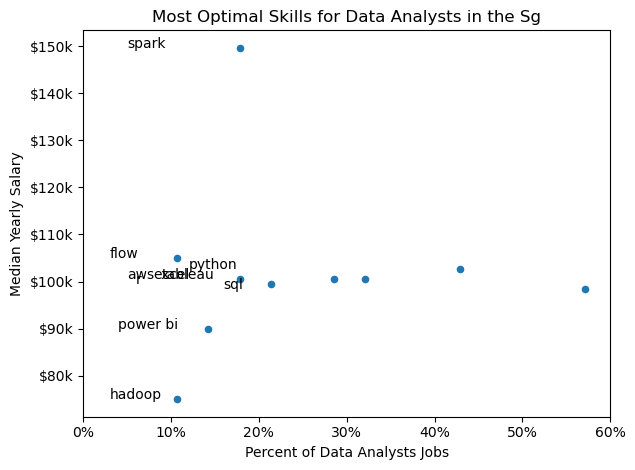

In [43]:
from adjustText import adjust_text

# fig, ax = plt.subplots()


df_da_skills_high_demand.plot(kind= 'scatter', x= 'skill_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_count'].iloc[i],df_da_skills_high_demand['median_salary'].iloc[i], txt))
    

plt.xlabel('Percent of Data Analysts Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the Sg')
plt.tight_layout()
plt.xlim(0,60)

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, post: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

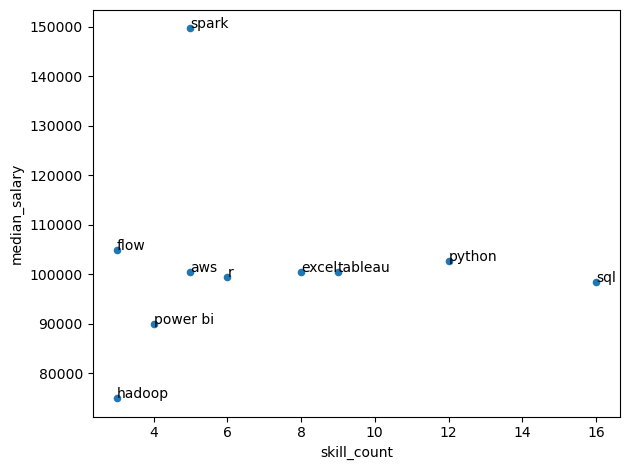

In [44]:
df_da_skills_high_demand.plot(kind= 'scatter', x= 'skill_count', y='median_salary')

for i, txt in enumerate(df_da_skills_high_demand.index):
    plt.text(df_da_skills_high_demand['skill_count'].iloc[i],df_da_skills_high_demand['median_salary'].iloc[i], txt)

plt.xlabel('Percent of Data Analysts Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the Sg')
plt.tight_layout()
plt.xlim(0,60)

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, post: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()